# <font color='Blue'>Lead Scoring - Case Study</font>
## <font color = 'cyan'>Problem Statement</font>
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. 
The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 
The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## <font color = 'cyan'>Goals of Case Study</font>

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## <font color = 'sky blue'> Data Collection and EDA </font>

### <font color = 'Green'> Importing File and Inspection</font>

In [4]:
#Importing required Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [5]:
#importing dataset to csv

lead_df=pd.read_csv("Leads.csv")

In [6]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
lead_df.shape

(9240, 37)

In [11]:
lead_df.isnull().sum()/lead_df.shape[0]

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

### <font color = 'Green'> Data Cleaning </font>

#### <font color = 'Megenta'>Identifying Missing Values</font>

In [14]:
print(lead_df.Magazine.value_counts())
print(lead_df['Receive More Updates About Our Courses'].value_counts())
print(lead_df['Update me on Supply Chain Content'].value_counts())
print(lead_df['Get updates on DM Content'].value_counts())
print(lead_df['I agree to pay the amount through cheque'].value_counts())


Magazine
No    9240
Name: count, dtype: int64
Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64
Update me on Supply Chain Content
No    9240
Name: count, dtype: int64
Get updates on DM Content
No    9240
Name: count, dtype: int64
I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64


In [15]:
lead_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
              'Get updates on DM Content','I agree to pay the amount through cheque'],axis = 1, inplace = True)

In [16]:
# The value Select in the columns are actaullay nulls since its the default data when data is not avaiable
#Replacing 'Select' values with Nan
lead_df=lead_df.replace("Select", np.nan)

In [17]:
#Identify Dulicate Rows if any
lead_df.duplicated().sum()


0

In [18]:
round((lead_df.isnull().sum()/lead_df.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

#### <font color = 'Megenta'>Dropping Columns with Missing Values >=35% and analysing other null values </font>

In [20]:
#Drop all the columns with more than 35% missing values
cols=lead_df.columns

for i in cols:
    if((100*(lead_df[i].isnull().sum()/lead_df.shape[0])) >= 35):
        lead_df.drop(i, axis =1, inplace = True)

In [21]:
round((lead_df.isnull().sum()/lead_df.shape[0])*100,4)


Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Newspaper Article                                 0.0000
X Education Forums                                0.0000
Newspaper                      

In [22]:
# Columns Prospect_ id and Lead Number are unique Numbers for each applicant and thus not needed for Modelling.
print(lead_df['Prospect ID'].nunique())
print(lead_df['Lead Number'].nunique())

9240
9240


In [23]:
lead_df.drop(['Prospect ID','Lead Number'],axis = 1, inplace = True)

In [24]:
print(lead_df.shape)
print(lead_df.info())
round((lead_df.isnull().sum()/lead_df.shape[0])*100,4)


(9240, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                  

Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Newspaper Article                                 0.0000
X Education Forums                                0.0000
Newspaper                                         0.0000
Digital Advertisement                             0.0000
Through Recommendations        

In [25]:
## Replacing Null values with Mode for Catogariacal Columns
lead_df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [26]:
lead_df['Lead Source'].fillna(lead_df['Lead Source'].mode()[0], inplace = True)

In [27]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')

In [28]:
#combining low frequency values to Others

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat','Social Media'] ,'Others')

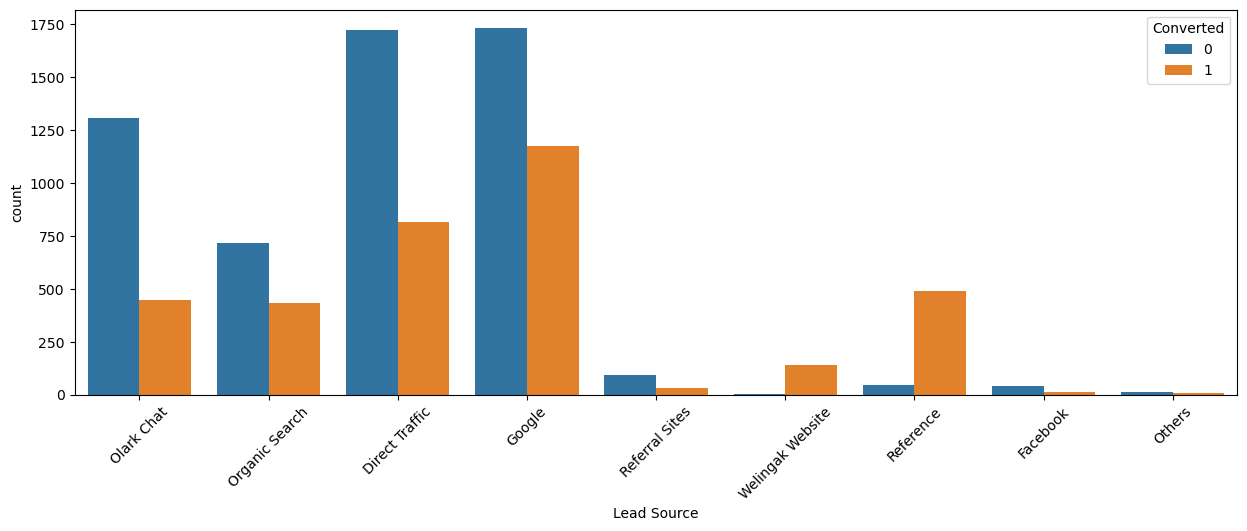

In [29]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [30]:
lead_df.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [31]:
lead_df['Country'].fillna(lead_df['Country'].mode()[0], inplace = True)

lead_df['Country'] = lead_df['Country'].replace(['Indonesia','Sri Lanka','Malaysia',
                                                     'Vietnam','Russia',
                                                     'Philippines','Bangladesh','Asia/Pacific Region',
                                                    'China','Kuwait','Oman','Bahrain','Hong Kong','Qatar','Saudi Arabia','Singapore','United Arab Emirates'] ,'Asia')
lead_df['Country'] = lead_df['Country'].replace(['Denmark','Switzerland','Netherlands',
                                                     'Belgium','Italy',
                                                     'Sweden','Canada','Germany',
                                                    'France','Australia','United Kingdom','United States','Kenya','Liberia','Tanzania',
                                                     'Ghana','Uganda',
                                                     'Nigeria','South Africa'] ,'Others')

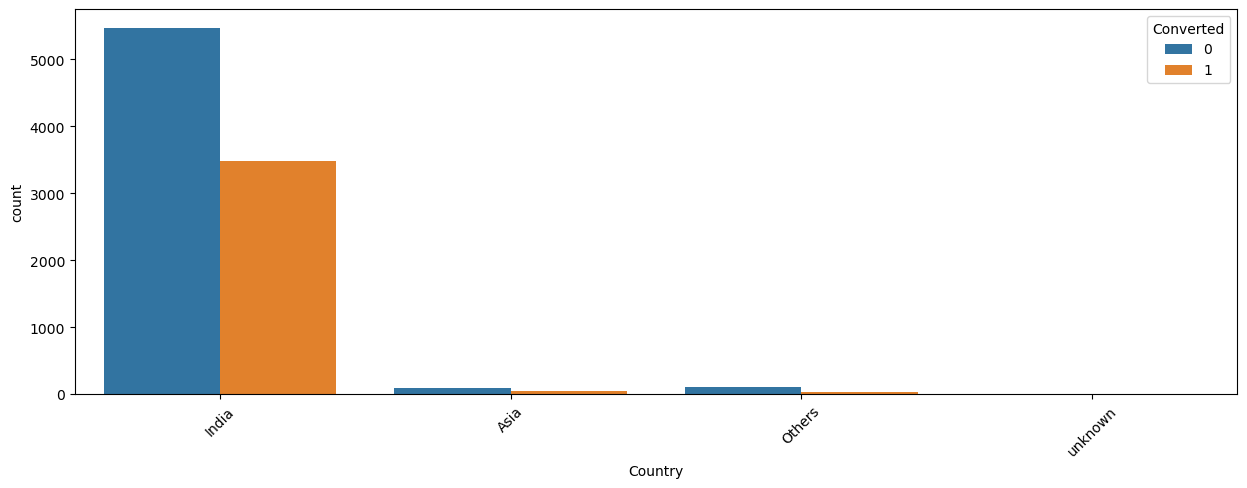

In [32]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [33]:
lead_df.drop('Country',axis = 1, inplace = True)

In [34]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unknown')

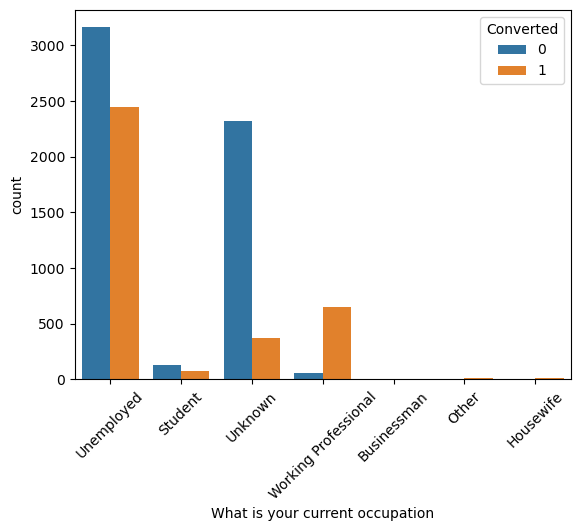

In [35]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [36]:
lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [37]:
# Most Values have only one Option - 'Better Career Prospects '. Not useful for modelling, so can be dropped.
lead_df.drop('What matters most to you in choosing a course', axis= True, inplace = True)

In [38]:
# the number of columns missing in TotalVisits and Pages per Visit is same. I.e Pages per visit is dependent on Total Visits.
#These Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
lead_df = lead_df.dropna()

In [39]:
# since TotalVisits have Outliners, replacing nulls with Median
lead_df.TotalVisits.fillna(lead_df.TotalVisits.median(),inplace = True)

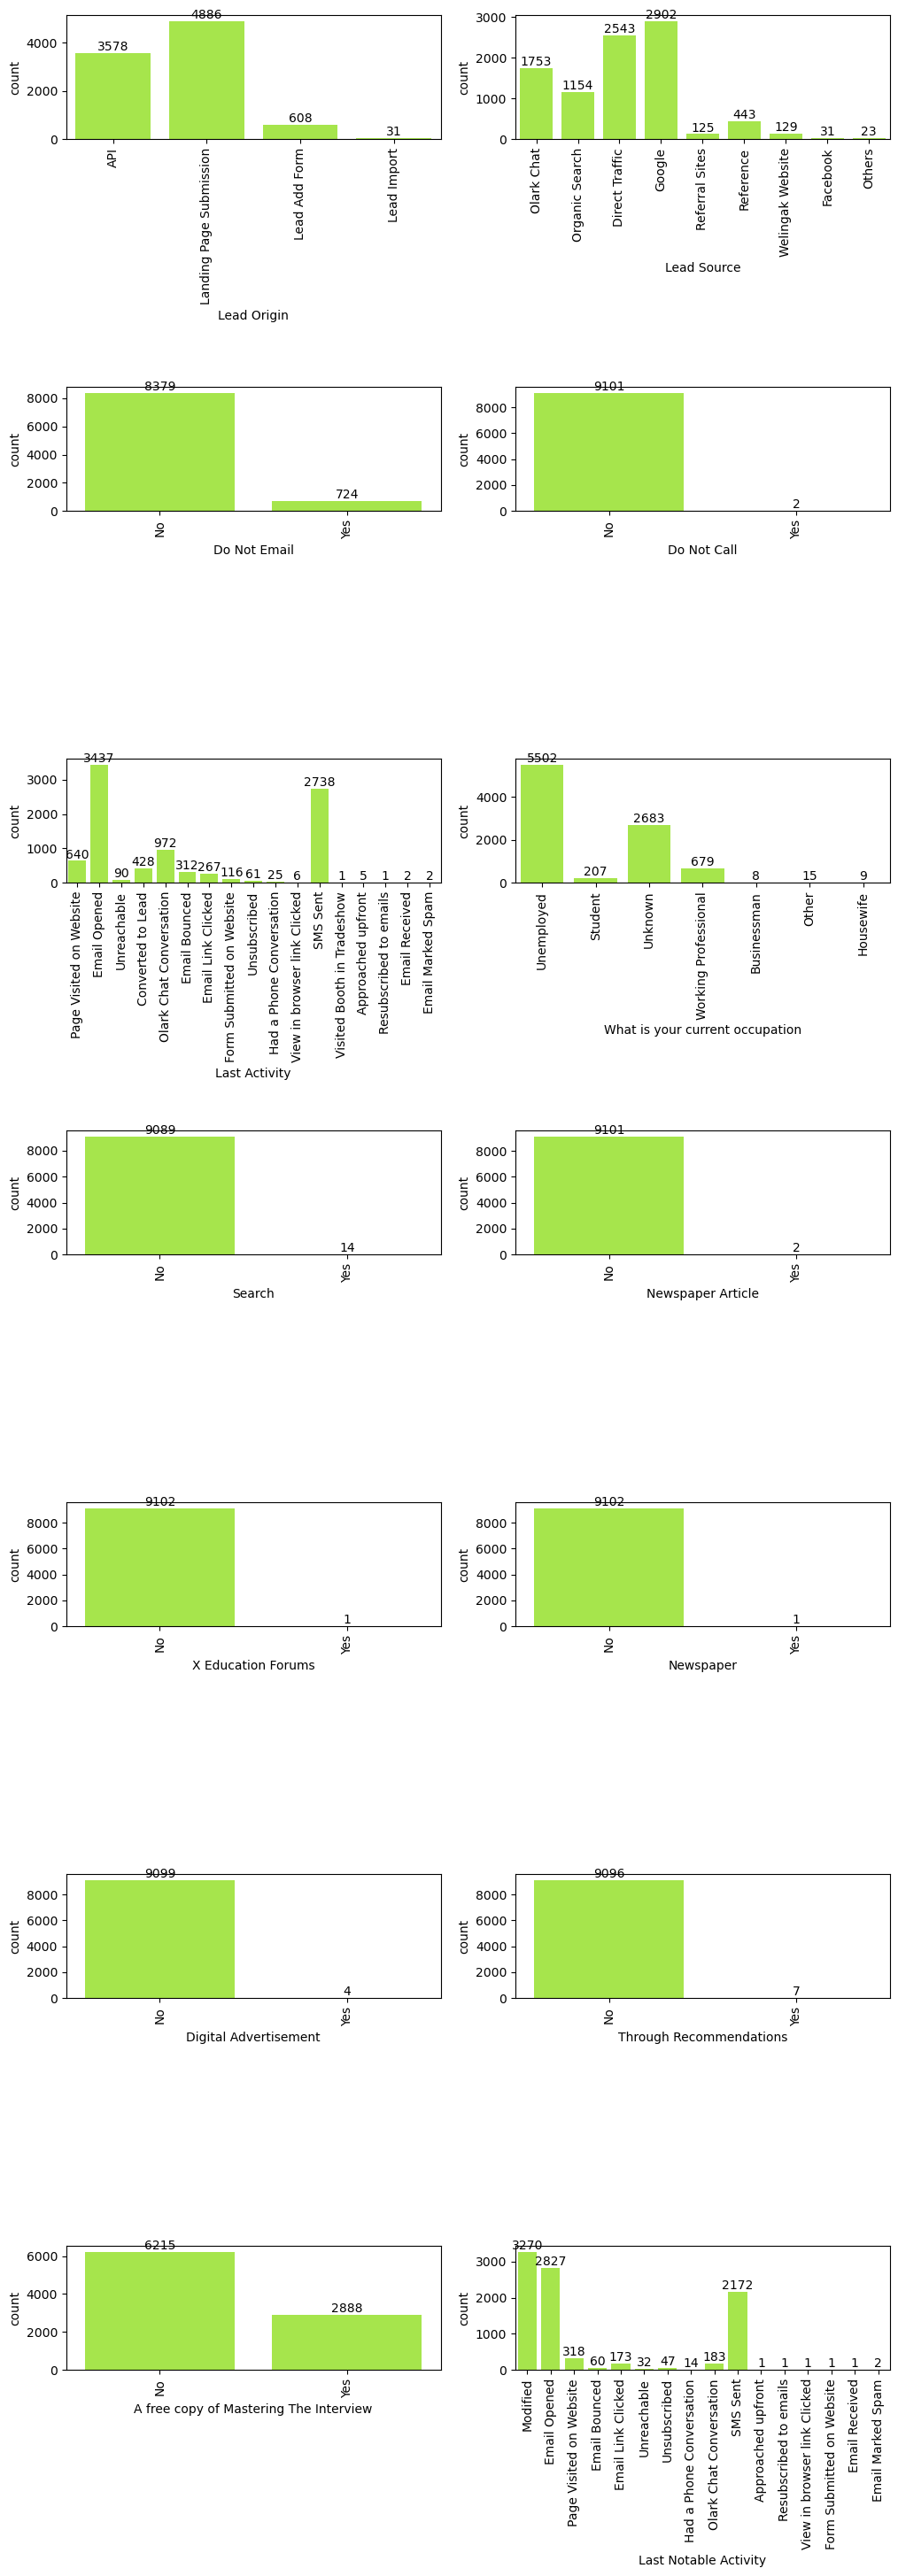

In [40]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = lead_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=lead_df,color = '#AAFF32') 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

In [41]:
# Grouping low frequency value levels to Others in Last Activity Column
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [42]:
# Dropping columns that are Skewed
lead_df.drop(['Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Do Not Call'], axis= 1, inplace = True)
              
              

In [43]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
 10  Last Notable Activity                   9103 non-null   object 
d

#### <font color = 'Megenta'>Handling Outliners </font>


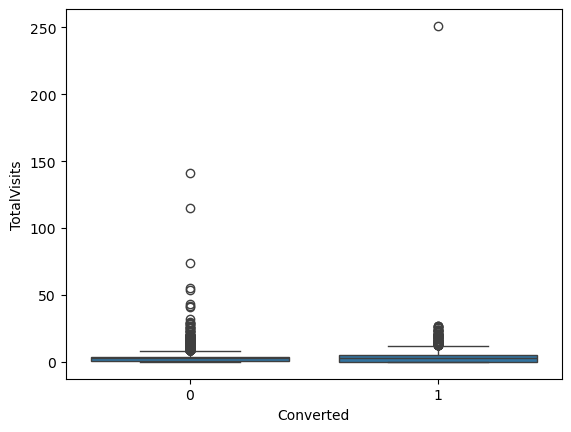

In [45]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

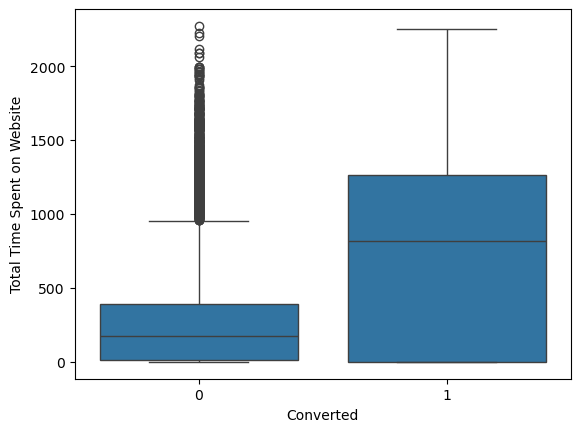

In [46]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)
plt.show()

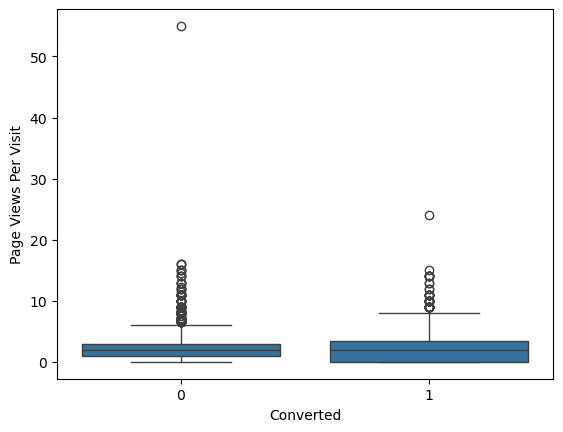

In [47]:
# Visualizing Page Views Per Visit w.r.t Target Variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)
plt.show()

In [48]:
# Defining UDF to treat outliers via IQR

def Outlier_treat(df,NumCols):
    for i in NumCols:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [49]:
ColList = ['Page Views Per Visit','TotalVisits']
Outlier_treat(lead_df,ColList)

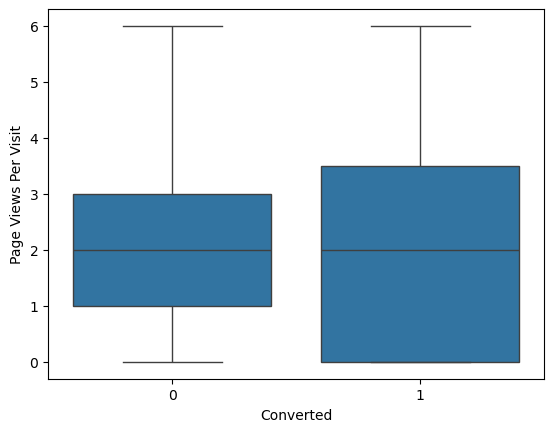

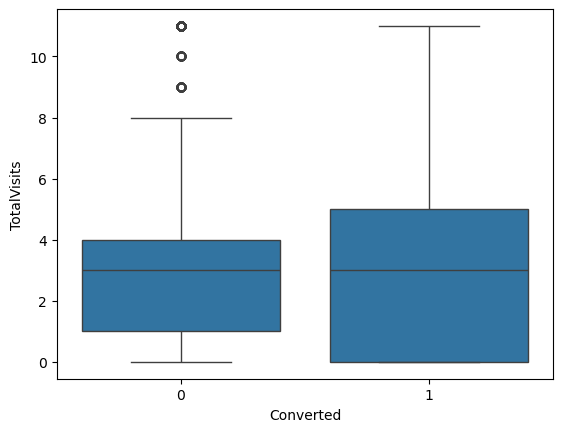

In [50]:
# Visualizing Page Views Per Visit w.r.t Target Variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)
plt.show()
# Visualizing Page Views Per Visit w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

In [51]:
#clubbing lower frequency values

lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

In [52]:
# Last Notable Activity resonates with the Last Activity and so can be dropped.
lead_df.drop('Last Notable Activity', axis = 1, inplace = True)

### <font color = 'Green'> Data Analysis EDA </font>

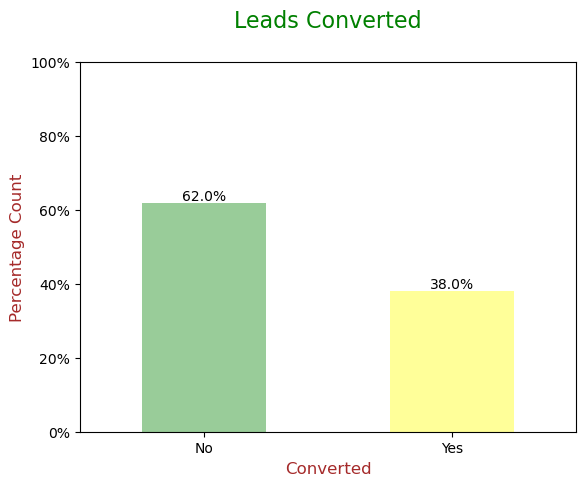

In [54]:
## ploting the results on bar plot

ax=(100*lead_df["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Yellow"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    

In [55]:
# 38% Lead Conversion date is found in the given data.
### Ratio of Data Imbalance
ratio=(lead_df["Converted"].value_counts(normalize=True).loc[0])/(lead_df["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.63 : 1


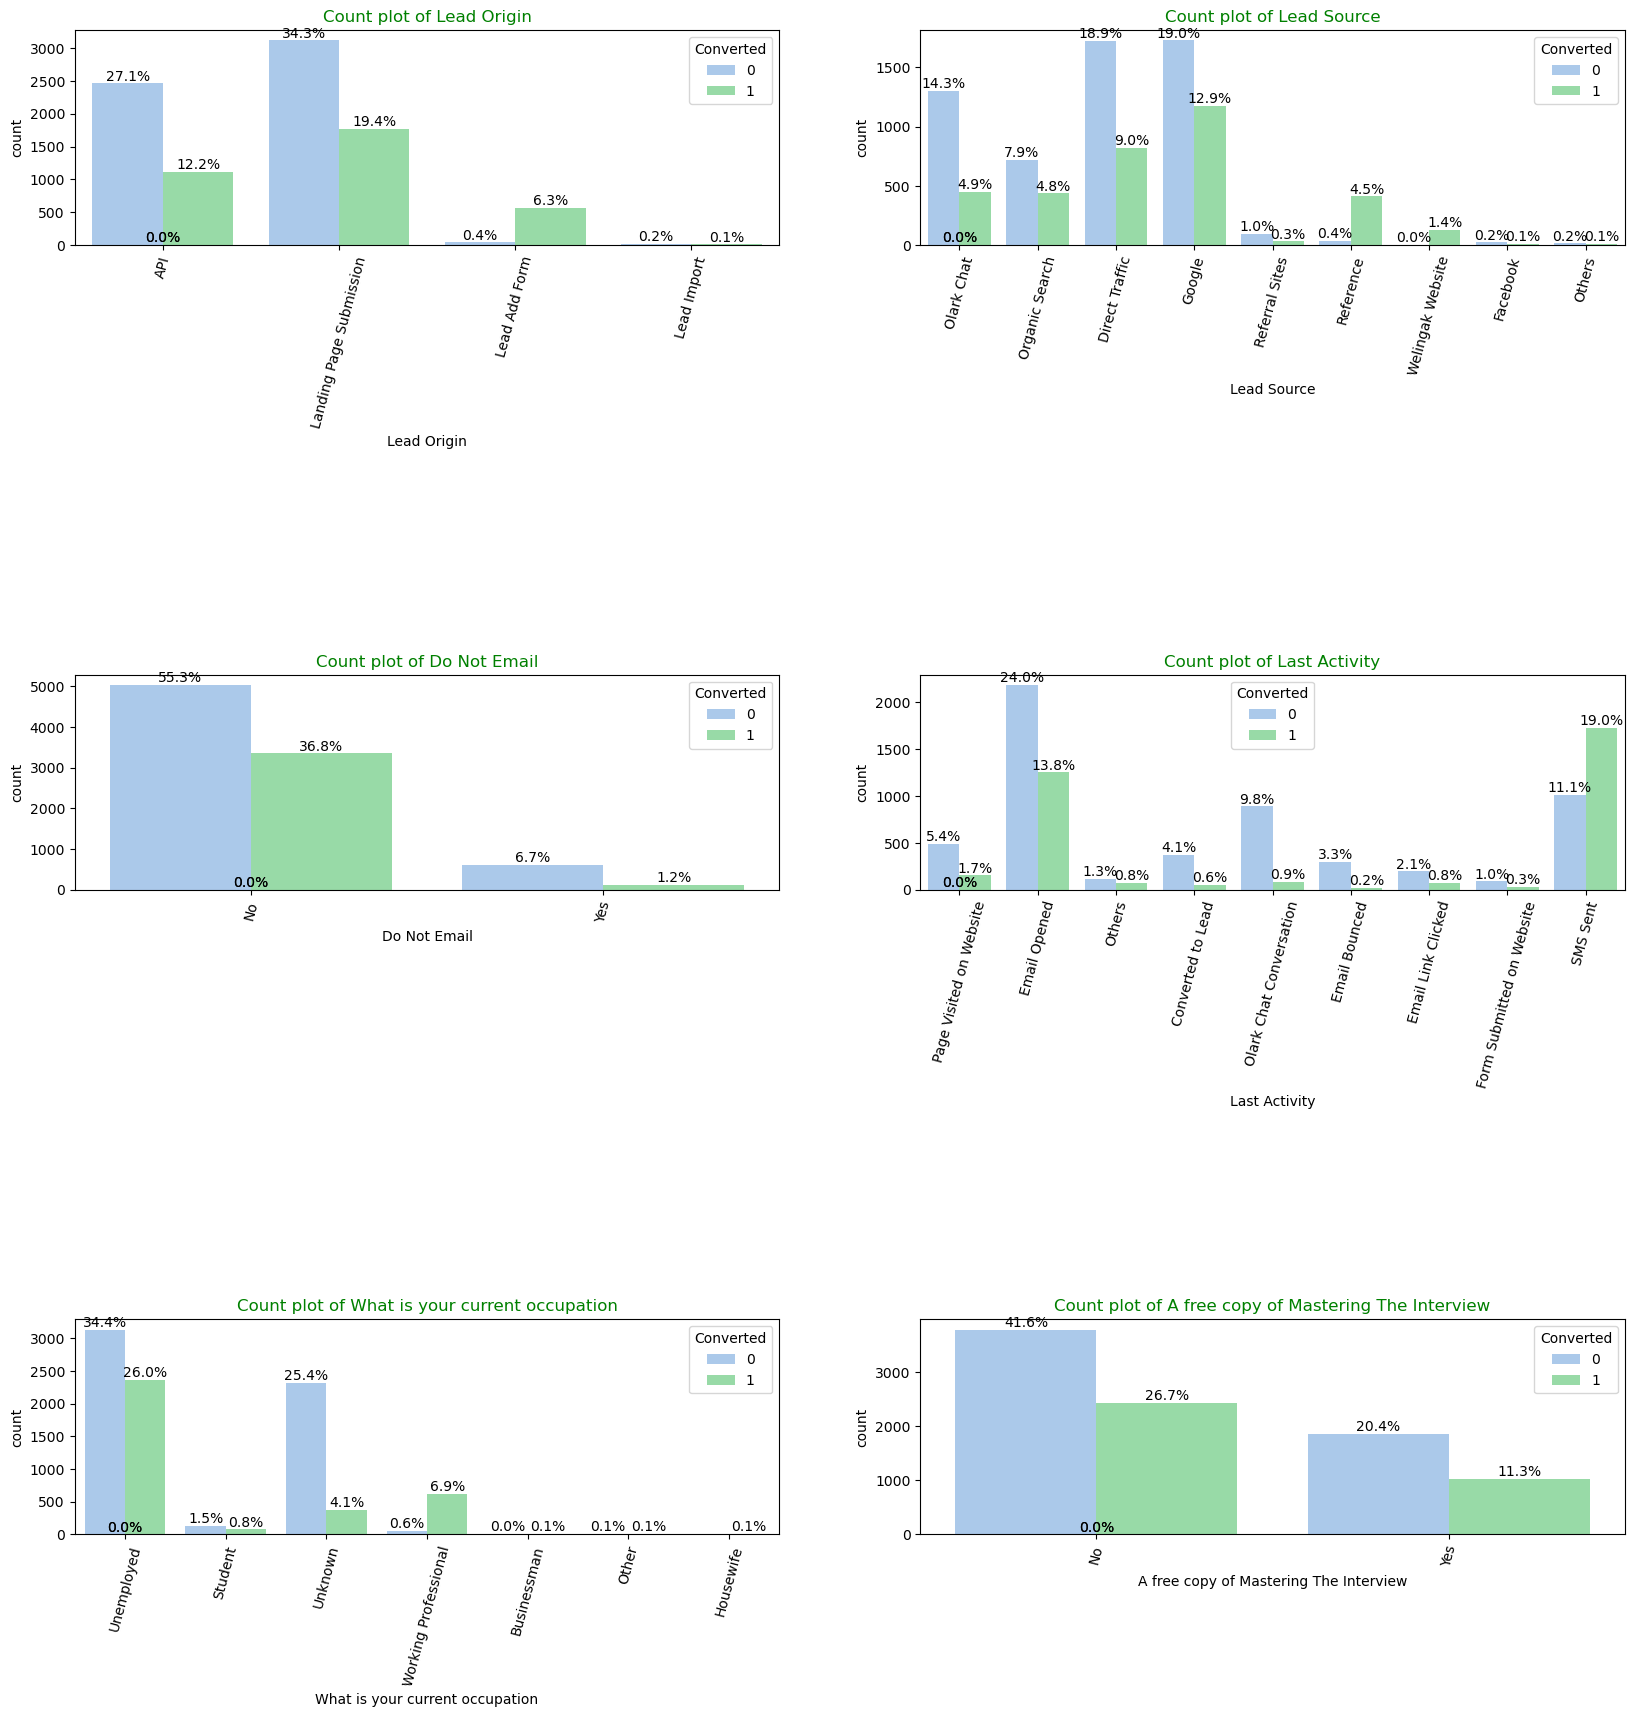

In [56]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = lead_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(20,120))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(15,2, i[0]+1)
    plt.title("Count plot of {}".format(i[1]),color="green")
    ax=sns.countplot(x=i[1],hue='Converted',data=lead_df,palette = 'pastel6') 
    plt.xticks(rotation=75)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/lead_df.shape[0])
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

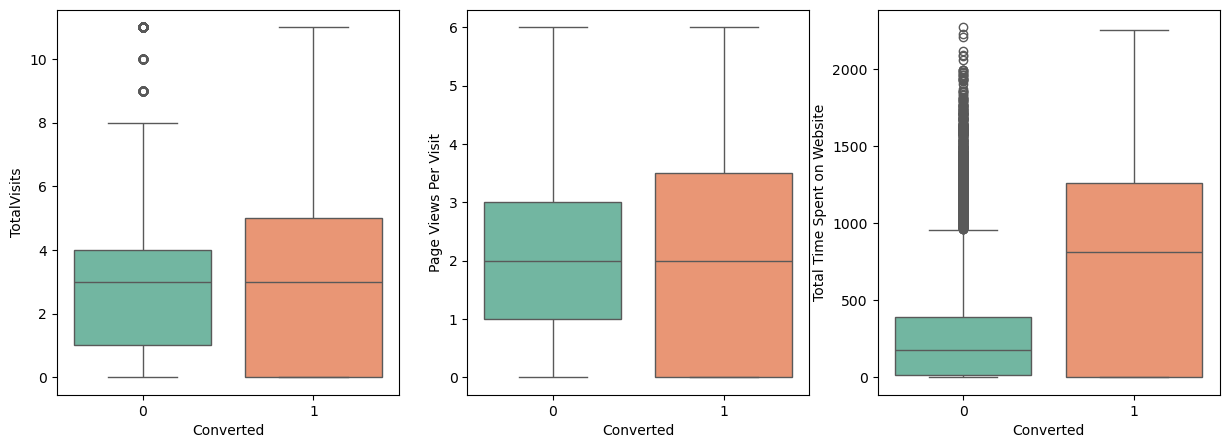

In [57]:

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df,palette = 'Set2')
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df,palette = 'Set2')
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df,palette = 'Set2')
plt.show()

Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

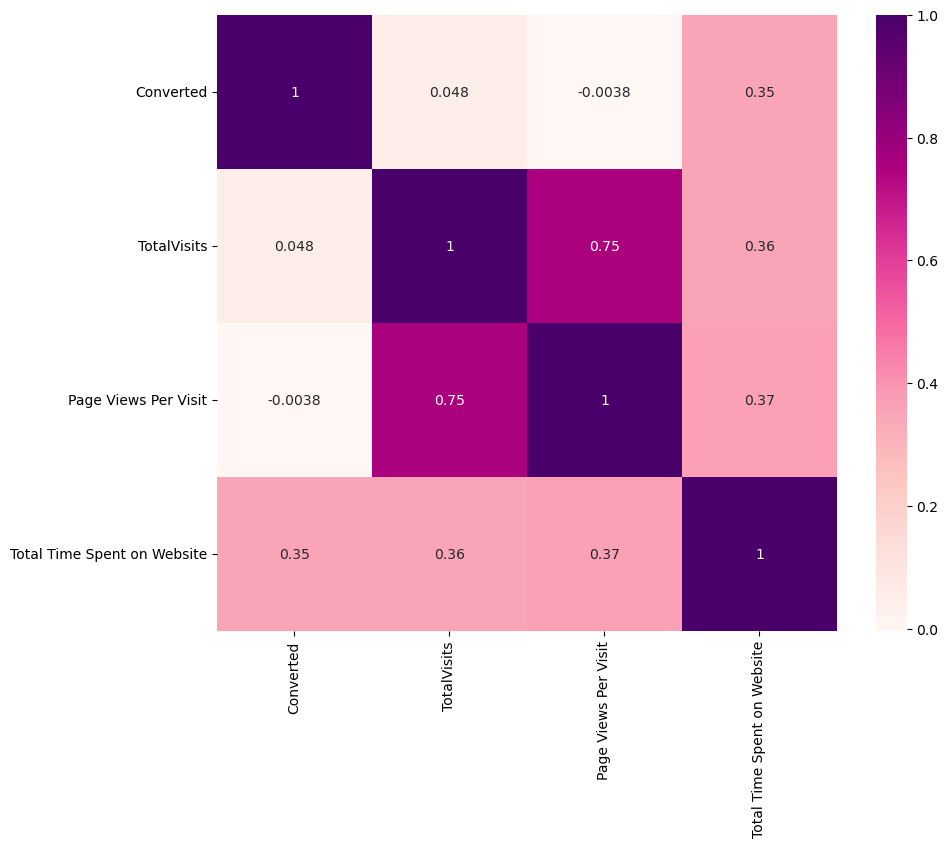

In [59]:
#Checking correlations of numeric values using heatmap
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(data=lead_df[num_cols].corr(),cmap="RdPu",annot=True)
plt.show()

## <font color = 'sky blue'> Data Preparation </font>

In [61]:
#Mapping Binary categorical variables
lead_df['Do Not Email'] = lead_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

lead_df['A free copy of Mastering The Interview'] = lead_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [62]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   int64  
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 782.3+ KB


In [63]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(lead_df[["Lead Origin","Lead Source","Last Activity"]], drop_first=True)
lead_df = pd.concat([lead_df, dummy], axis = 1)

In [64]:
dummy = pd.get_dummies(lead_df['What is your current occupation'], prefix  = 'Occupation')
dummy.head()
dummy = dummy.drop(['Occupation_Unknown'], axis = 1)
lead_df = pd.concat([lead_df, dummy], axis = 1)

In [65]:
lead_df.drop(["Lead Origin","Lead Source","Last Activity","What is your current occupation"],axis =1,inplace = True)

In [66]:
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,0,0,0.0,0,0.0,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,0,0,5.0,674,2.5,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,1,2.0,1532,2.0,1,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1.0,305,1.0,0,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,0,1,2.0,1428,1.0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [67]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Do Not Email                             9103 non-null   int64  
 1   Converted                                9103 non-null   int64  
 2   TotalVisits                              9103 non-null   float64
 3   Total Time Spent on Website              9103 non-null   int64  
 4   Page Views Per Visit                     9103 non-null   float64
 5   A free copy of Mastering The Interview   9103 non-null   int64  
 6   Lead Origin_Landing Page Submission      9103 non-null   bool   
 7   Lead Origin_Lead Add Form                9103 non-null   bool   
 8   Lead Origin_Lead Import                  9103 non-null   bool   
 9   Lead Source_Facebook                     9103 non-null   bool   
 10  Lead Source_Google                       9103 non-nul

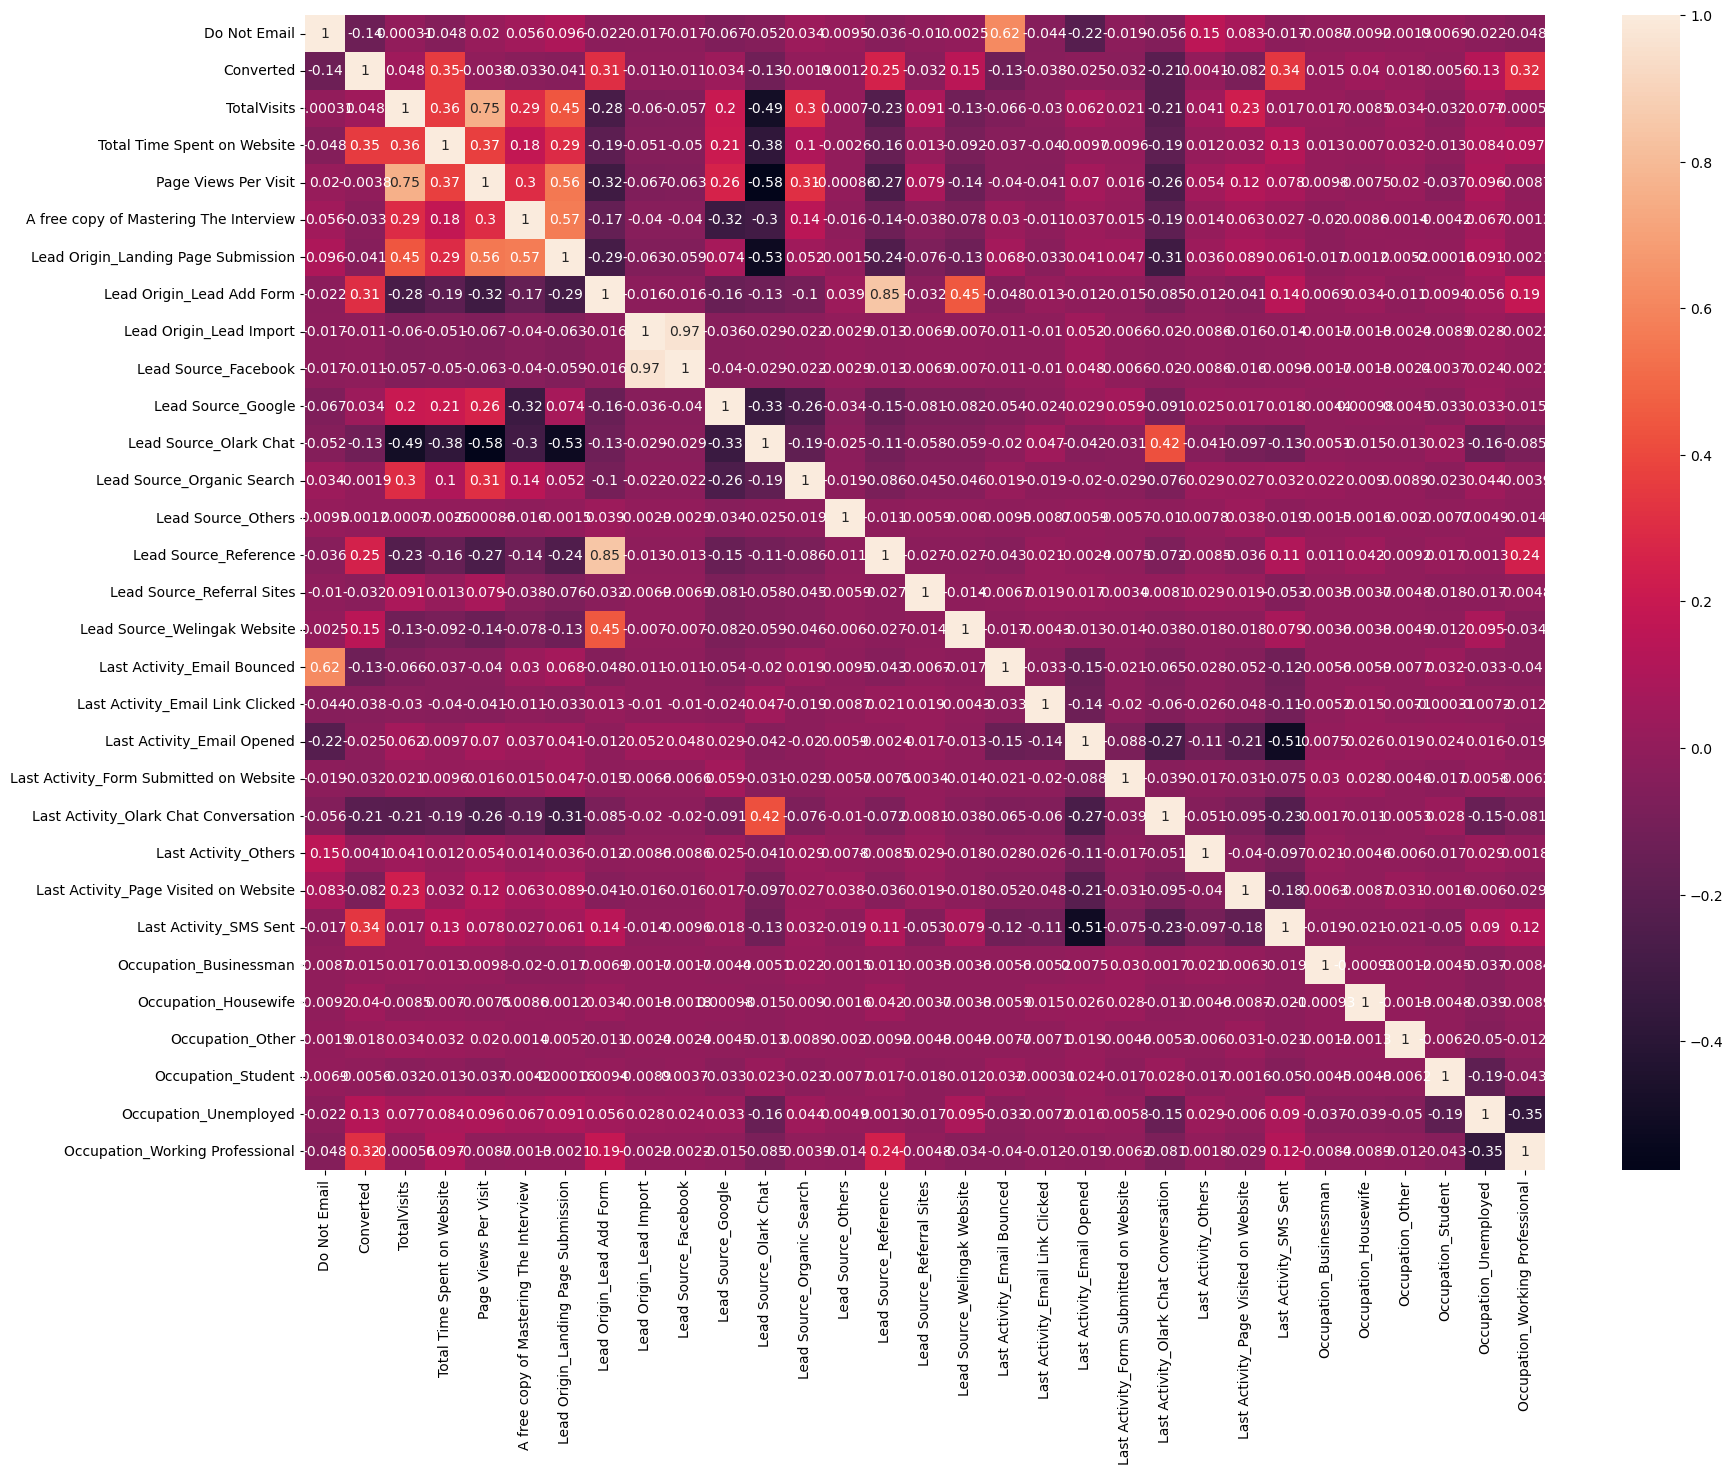

In [68]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

In [69]:
lead_df.drop(['Do Not Email','Lead Origin_Lead Import','Page Views Per Visit'],axis= 1, inplace = True)

## <font color = 'sky blue'> Test - Train Split </font>

In [71]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split
# convert Bool data types to int
bool_columns = lead_df.select_dtypes(include='bool').columns
lead_df[bool_columns] = lead_df[bool_columns].astype('int')

In [72]:
# Putting feature variable to X
X=lead_df.drop('Converted', axis=1)

#checking head of X
X.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,0.0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,5.0,674,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2.0,1428,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
# Putting response variable to y
y = lead_df['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## <font color = 'sky blue'> Feature Scaling</font>

In [76]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [77]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7962,-0.079783,1.476324,-0.681042,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5520,1.299804,-0.771066,-0.681042,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,0.610010,-0.571257,-0.681042,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1566,2.679391,1.393834,-0.681042,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9170,-1.114473,-0.881052,-0.681042,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
LCR

38.02043282434362

## <font color = 'sky blue'> Model Building using Stats Model & RFE</font>

In [80]:
# importing necessary library
import statsmodels.api as sm

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [82]:
rfe.support_

array([False,  True, False, False,  True,  True, False,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True])

In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 13),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Others', False, 8),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 2),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 5),
 ('Last Activity_Olark Chat Conversation', False, 7),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Occupation_Businessman', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other

In [84]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Occupation_Businessman',
       'Occupation_Housewife', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional'],
      dtype='object')

In [85]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website'],
      dtype='object')

In [86]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

## <font color = 'sky blue'> Model fine tuning using GLM & VIF</font>

### <font color = 'Green'> Model 1</font>

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.2
Date:                Thu, 12 Sep 2024   Deviance:                       5266.3
Time:                        19:00:05   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3942
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.2248      0.114    -28.230      0.000      -3.449      -3.001
Total Time Spent on Website         1.1189      0.040     27.767      0.000       1.040       1.198
Lead Origin_Lead Add Form           3.6578      0.223     16.404      0.000       3.221       4.095
Lead Source_Facebook                0.8786      0.454      1.936      0.053      -0.011       1.768
Lead Source_Olark Chat              1.2252      0.103     11.940      0.000       1.024       1.426
Lead Source_Welingak Website        1.7641      0.756      2.333      0.020       0.282       3.246
Last Activity_Email Bounced        -1.0633      0.323     -3.295      0.001      -1.696      -0.431
Last Activity_Email Opened          1.0181      0.097     10.480      0.000       0.828       1.208
Last Activity_Others                1.2307      0.220      5.597      0.000       0.800       1.662
Last Activity_SMS Sent              2.0410      0.101     20.247      0.000       1.843       2.239
Occupation_Businessman              2.2362      1.053      2.124      0.034       0.173       4.299
Occupation_Housewife               24.3254   1.62e+04      0.002      0.999   -3.18e+04    3.18e+04
Occupation_Other                    1.7334      0.659      2.629      0.009       0.441       3.025
Occupation_Student                  1.2966      0.239      5.428      0.000       0.828       1.765
Occupation_Unemployed               1.2314      0.087     14.081      0.000       1.060       1.403
Occupation_Working Professional     3.7823      0.198     19.101      0.000       3.394       4.170
===================================================================================================
"""

In [90]:
#NOTE : "Occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

### <font color = 'Green'> Model 2</font>

In [92]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Occupation_Businessman',
       'Occupation_Housewife', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional'],
      dtype='object')

In [93]:
# Dropping 'Current_occupation_Housewife' column
col = col.drop("Occupation_Housewife")

In [94]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                             -3.185998
Total Time Spent on Website        1.117961
Lead Origin_Lead Add Form          3.682913
Lead Source_Facebook               0.874151
Lead Source_Olark Chat             1.212188
Lead Source_Welingak Website       1.736890
Last Activity_Email Bounced       -1.072638
Last Activity_Email Opened         1.017694
Last Activity_Others               1.220145
Last Activity_SMS Sent             2.029077
Occupation_Businessman             2.198761
Occupation_Other                   1.696823
Occupation_Student                 1.262638
Occupation_Unemployed              1.199081
Occupation_Working Professional    3.747832
dtype: float64

In [95]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.0
Date:                Thu, 12 Sep 2024   Deviance:                       5290.1
Time:                        19:00:05   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [96]:
get_vif(X_train_rfe)

,Features,VIF
0,Occupation_Unemployed,2.29
1,Last Activity_SMS Sent,1.74
2,Last Activity_Email Opened,1.69
3,Lead Origin_Lead Add Form,1.58
4,Lead Source_Olark Chat,1.33
5,Lead Source_Welingak Website,1.32
6,Total Time Spent on Website,1.31
7,Occupation_Working Professional,1.29
8,Last Activity_Email Bounced,1.05
9,Last Activity_Others,1.05


## <font color = 'sky blue'> Model Evaluation</font>

### <font color = 'Green'> Predict the Target Variable in Train set.</font>

In [99]:
# Getting the predicted values on the train set
y_train_pred = logm2.predict(X_train_sm2)           # giving prob. of getting 1

y_train_pred[:10]

7962    0.844570
5520    0.138090
1962    0.355149
1566    0.958425
9170    0.322563
5097    0.125527
8954    0.462638
309     0.195411
5519    0.282983
1050    0.568940
dtype: float64

In [100]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.8445701 , 0.13809008, 0.35514871, 0.95842456, 0.32256318,
       0.1255273 , 0.46263818, 0.19541079, 0.28298257, 0.56894041])

In [101]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob
0,0,0.844570
1,0,0.138090
2,0,0.355149
3,1,0.958425
4,0,0.322563


In [102]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.844570,1
1,0,0.138090,0
2,0,0.355149,0
3,1,0.958425,1
4,0,0.322563,0


### <font color = 'Green'> Confusion Matrix.</font>

In [104]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3525  428]
 [ 742 1677]]


### <font color = 'Green'> Accuracy</font>

In [106]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8163841807909604


In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### <font color = 'Green'> Sensitivity and Specificity</font>

In [109]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6932616783794957


In [110]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.891727801669618


In [111]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10827219833038199


In [112]:
# positive predictive value 
print (TP / float(TP+FP))

0.7966745843230404


In [113]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8261073353644246


### <font color = 'Green'> ROC Curve</font>

In [115]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

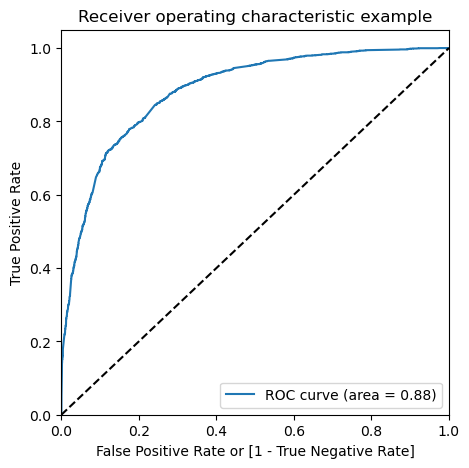

In [117]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

#### <font color = 'Megenta'>Finding Optimal Cutoff Point/ Probability</font>

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.844570,1,1,1,1,1,1,1,1,1,1,0
1,0,0.138090,0,1,1,0,0,0,0,0,0,0,0
2,0,0.355149,0,1,1,1,1,0,0,0,0,0,0
3,1,0.958425,1,1,1,1,1,1,1,1,1,1,1
4,0,0.322563,0,1,1,1,1,0,0,0,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.611425  0.975610  0.388566
0.2   0.2  0.745920  0.913187  0.643562
0.3   0.3  0.784683  0.856552  0.740703
0.4   0.4  0.811362  0.755684  0.845434
0.5   0.5  0.816384  0.693262  0.891728
0.6   0.6  0.797238  0.585779  0.926638
0.7   0.7  0.779661  0.508061  0.945864
0.8   0.8  0.755336  0.410087  0.966608
0.9   0.9  0.710295  0.256304  0.988110


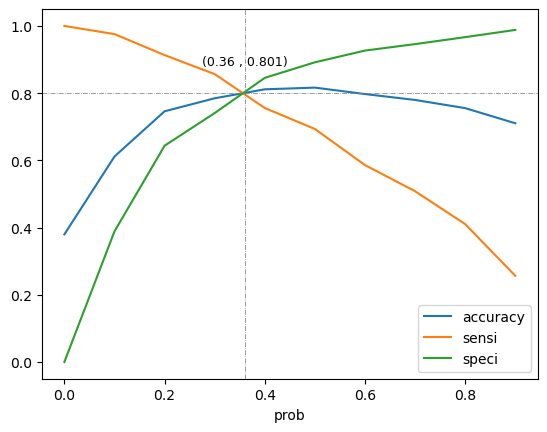

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sen_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')

intersection_1 = np.round(float(fsolve(lambda x : sen_interp(x) - acc_interp(x), 0.5)), 2)

# Find the intersection points of the specificity and accuracy curves
spec_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : spec_interp(x) - acc_interp(x), 0.5)), 2)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 3)
sensitivity_at_intersection = np.round(float(sen_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(spec_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle= 'dashdot')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='dashdot')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.36 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,0,0.844570,1
1,0,0.138090,0
2,0,0.355149,0
3,1,0.958425,1
4,0,0.322563,0


### <font color = 'Green'> Calculating all metrics using confusion matrix for new Train split based on cutoff value 0.36</font> 

In [124]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8024168236032643


In [125]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy*100,2),'%')
    print ("Model Sensitivity                : ", round(sensi*100,2),'%')
    print ("Model Specificity                : ", round(speci*100,2),'%')
    print ("Model Precision                  : ", round(precision*100,2),'%')
    print ("Model Recall                     : ", round(recall*100,2),'%')
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [126]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")

Confusion Matrix
[[3214  739]
 [ 520 1899]] 

True Negative                    :  3214
True Positive                    :  1899
False Negative                   :  520
False Positve                    :  739
Model Accuracy                   :  80.24 %
Model Sensitivity                :  78.5 %
Model Specificity                :  81.31 %
Model Precision                  :  71.99 %
Model Recall                     :  78.5 %
Model True Positive Rate (TPR)   :  0.785
Model False Positive Rate (FPR)  :  0.1869




### <font color = 'Green'> Precision and recall tradeoff</font> 

In [128]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

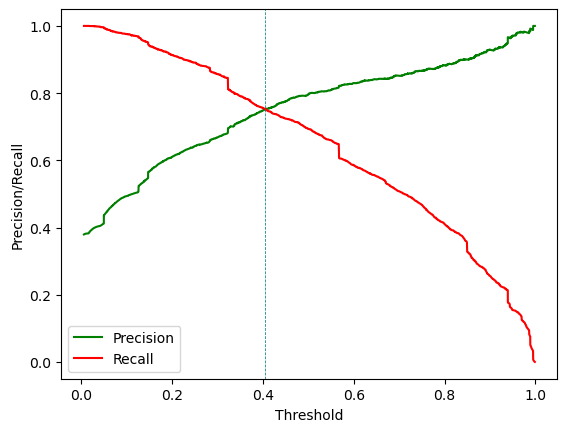

In [129]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.405, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

# Displaying the plot
plt.show()


In [130]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [131]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.405 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,final_predicted,precision_recall_prediction
0,0,0.844570,1,1
1,0,0.138090,0,0
2,0,0.355149,0,0
3,1,0.958425,1,1
4,0,0.322563,0,0


In [132]:
## Lets see all matrics at 0.405 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])

#
print("Confusion Matrix")
print(confusion_matrix,"\n")
# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")


Confusion Matrix
[[3354  599]
 [ 601 1818]] 

True Negative                    :  3354
True Positive                    :  1818
False Negative                   :  601
False Positve                    :  599
Model Accuracy                   :  81.17 %
Model Sensitivity                :  75.16 %
Model Specificity                :  84.85 %
Model Precision                  :  75.22 %
Model Recall                     :  75.16 %
Model True Positive Rate (TPR)   :  0.7516
Model False Positive Rate (FPR)  :  0.1515




### <font color = 'Green'> Adding Lead Score Feature to Training dataframe</font> 

In [134]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,final_predicted,Lead_Score
0,0,0.844570,1,84
1,0,0.138090,0,14
2,0,0.355149,0,36
3,1,0.958425,1,96
4,0,0.322563,0,32


## <font color = 'sky blue'>  Making Predictions on test set</font>

### <font color = 'Green'> Scaling Test dataset</font> 

In [137]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Occupation_Businessman,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
3504,-0.103815,0,0,0,0,0,1,0,0,0,0,0,1,0
4050,-0.881052,1,0,0,0,0,0,0,1,0,0,0,1,0
7201,0.424120,0,0,0,0,0,0,0,1,0,0,0,1,0
1196,-0.105648,0,0,0,0,0,1,0,0,0,0,0,1,0
8219,-0.428274,0,0,0,0,0,0,0,0,0,0,0,1,0


In [138]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2731, 15)

### <font color = 'Green'> Prediction on Test Dataset using final model</font> 

In [140]:
# making prediction using model 2 (final model)
y_test_pred = logm2.predict(X_test_sm)

In [141]:
y_test_pred[:10]

3504    0.252507
4050    0.939351
7201    0.626285
1196    0.252121
8219    0.078297
8747    0.125527
9048    0.598754
6524    0.067900
7693    0.344892
8187    0.939351
dtype: float64

In [142]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
3504,0.252507
4050,0.939351
7201,0.626285
1196,0.252121
8219,0.078297


In [143]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3504,0
4050,1
7201,0
1196,0
8219,1


In [144]:


# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.252507
1,1,0.939351
2,0,0.626285
3,0,0.252121
4,1,0.078297


In [145]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Converted,Converted_Prob
0,0,0.252507
1,1,0.939351
2,0,0.626285
3,0,0.252121
4,1,0.078297


In [146]:
# taking sensitivity-specificity method at 0.36 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.36 else 0)
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,0,0.252507,0
1,1,0.939351,1
2,0,0.626285,1
3,0,0.252121,0
4,1,0.078297,0


### <font color = 'Green'> ROC Curve for Test</font> 

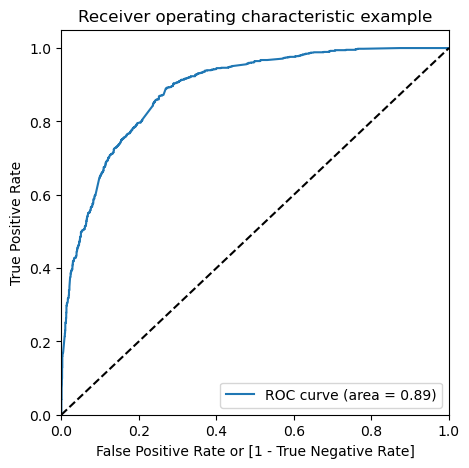

In [148]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

### <font color = 'Green'> Test set Model Evaluation</font> 

In [150]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)


************************************************** 

Confusion Matrix
[[1378  311]
 [ 228  814]] 

************************************************** 

True Negative                    :  1378
True Positive                    :  814
False Negative                   :  228
False Positve                    :  311
Model Accuracy                   :  80.26 %
Model Sensitivity                :  78.12 %
Model Specificity                :  81.59 %
Model Precision                  :  72.36 %
Model Recall                     :  78.12 %
Model True Positive Rate (TPR)   :  0.7812
Model False Positive Rate (FPR)  :  0.1841


<italic><span style="color:blue">Lead Score: </span></italic> Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance 
- The customers with a lower lead score have a lower conversion chance.